## Startup Success/Fail Dataset from Crunchbase

Here the objective is to analyze data in order to summarize its main characteristics, to better understand the data set, to discover relationships between different variables and to extract important variables for the problem we are trying to solve.

**Objective**<br>

The objective of the project is to predict whether a startup that is currently operating will become a success or a failure. The success of a company is defined as the event that provides the founders of the company with a large sum of money through the M&A (Merger and Acquisition) process or an IPO (Initial Public Offering). A company would be considered a failure if it had to close.

In this case I will not go as far as the modeling stage but I do plan to go through all the steps leading up to an EDA and get to `Data Preparation`.

I will have to answer the following questions:

* How many new companies fail?
* How many start-ups succeed?
* Reasons for failure
* How to avoid failure
* And many other questions...

<h4>Dataset Source</h4>
<ul>
<li>Link - <a href="https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase">https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase</a></li>
<li>This dataset contains 66396 Rows and 14 columns</li>
</ul>

In [28]:
#required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [29]:
df = pd.read_csv("./data/big_startup_success_dataset.csv")
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


<h3>dataset Overview</h3>

<ul>
  <li>permalink</li>
  <li>Name of startup</li>
  <li>homePageUrl : website link of the startup</li>
  <li>category : category of the startup</li>
  <li>funding_total_USD : total funding amount in USD</li>
  <li>status : (operational status)</li>
  <li>country Code : country code of the startup</li>
  <li>State Code : state code of the startup</li>
  <li>Region : Region of the startup</li>
  <li>City : City of the startup in given region</li>
  <li>Funding Round : How many times Startup has raised funding</li>
  <li>Founded_At : year the startup was founded</li>
  <li>First_Funding_At : year the startup received its first funding</li>
  <li>Last_Funding_At : year the startup received its last funding</li>
</ul>

<h2> Exploratory Data Analysis </h2>

<h3> Handling Missing Values </h3>

In [31]:
df.isna().sum()

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

Let's Visulaize the missing values in the dataset
<ul>
  <li>See if we find a pattern in the missing values, such as a part of the dataset where values are missing for many columns at once.
</li>
</ul>

<Axes: >

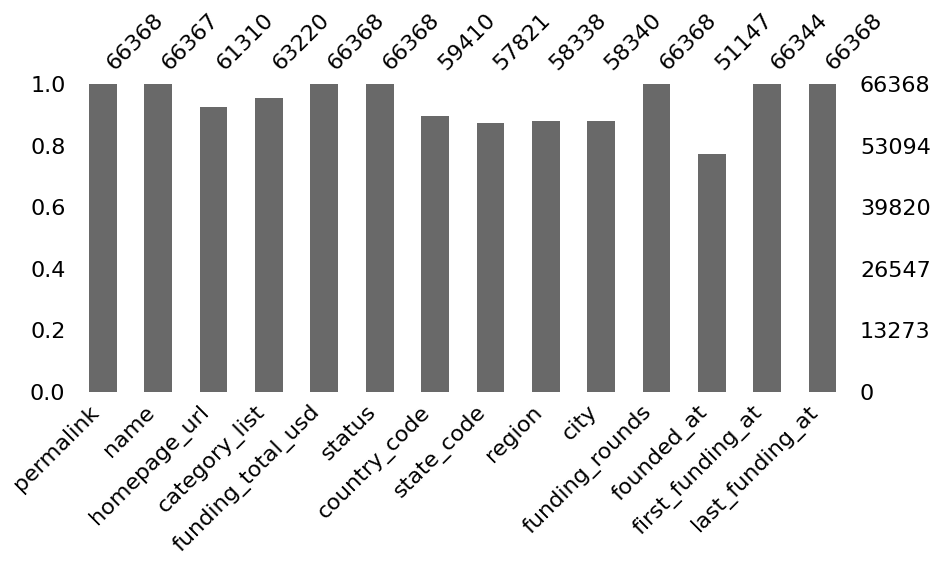

In [32]:
msno.bar(df, figsize=(10,4))

<Axes: >

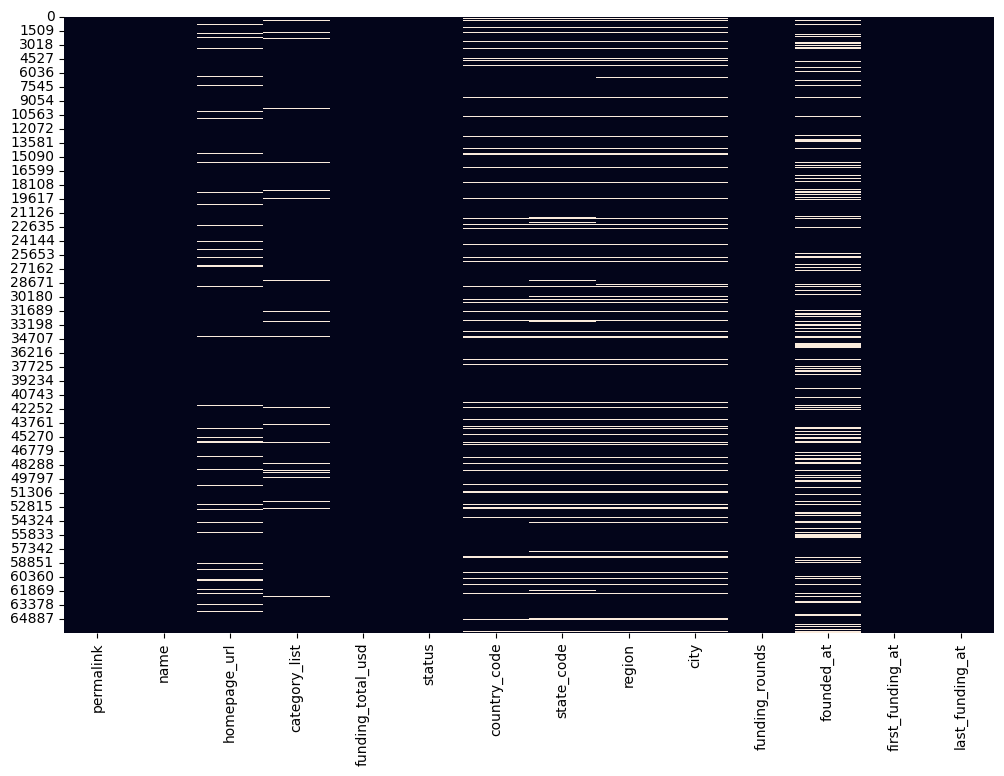

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False)


We can't distinguish a clear interval of rows with missing values, nor a clear relation, the only thing that we can appreciate is that almost all the rows with a missing value in the country_code column, also have missing values in state, region, and city.



First In The category list we have almost 5000 rows with missing values, we can replace them with "Unknown" or "Other" (here i am taking as Other)

-> For the colums which missing values in one of the address columns (country_code, state_code, region, city), this makes sense because if we don't know the country, we can't know the state, region or city. So we can replace all the missing values With the random Sample Imputation technique.

--> Finally, we have the column with the most missing data, having only about 70% of the data when it was founded. We could replace those values by first_funding_at or extract the years (which is what we are looking for), and apply a fill using Random Sample Imputation as well

Let's Visulaize the Column with Status for the Prediction

Text(0, 0.5, 'Number of startups')

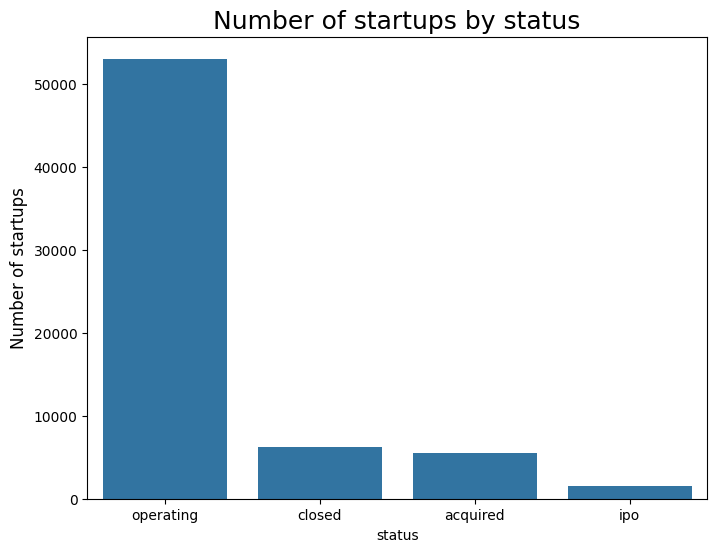

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['status'].value_counts().index,y=df['status'].value_counts())
plt.title('Number of startups by status',size=18)
plt.ylabel('Number of startups',size=12)

Let's Visualize the Funding rounds of the startups

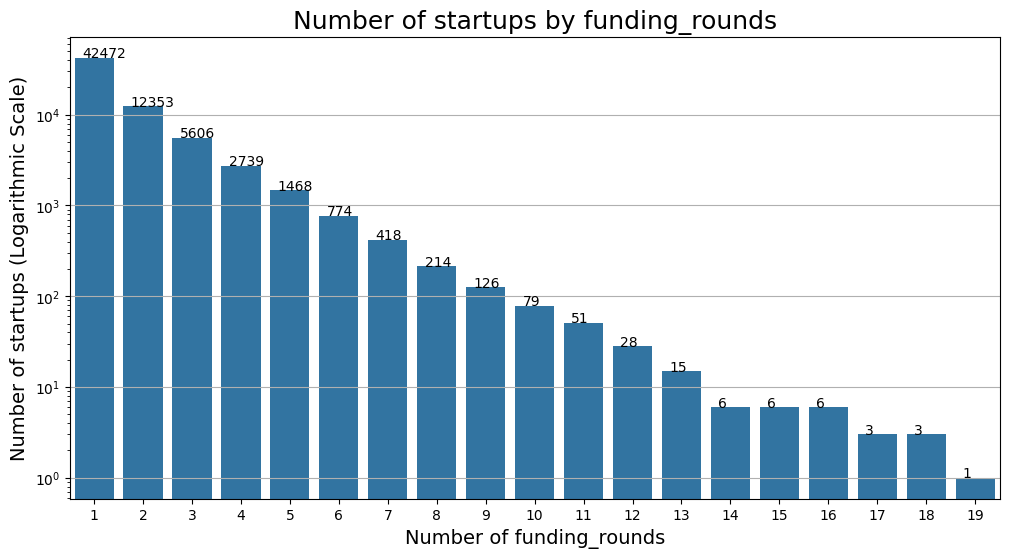

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['funding_rounds'].value_counts().index, y=df['funding_rounds'].value_counts())
plt.title('Number of startups by funding_rounds',size=18)
plt.ylabel('Number of startups (Logarithmic Scale)',size=14)
plt.xlabel('Number of funding_rounds', size=14)
plt.grid(axis='y')
plt.yscale('log')

def addlabels(x,y):
    for i in x:
        plt.text(i-1.25,y[i],y[i])

addlabels(df['funding_rounds'].value_counts().index,df['funding_rounds'].value_counts())

In [36]:
df['category_list'].value_counts()

category_list
Software                                                                                                                                                                                                                                    3995
Biotechnology                                                                                                                                                                                                                               3615
E-Commerce                                                                                                                                                                                                                                  1332
Mobile                                                                                                                                                                                                                                      1177
Clean Technology      

We have Too many categories in the category_list column, This is due to the fact that many startups have multiple categories, we can reduce the number of categories by taking only the first category of each startup.

1) take the first category of each startup
2) if null than replace with "Other"

<h3> Data Wrangling </h3>

filling and transforming missing values in funding_total_usd

In [37]:
# Transforming funding_total_usd in float, filling missing values
def convert_to_float(x):
  return np.nan if x == '-' else float(x)

df['funding_total_usd'] = df['funding_total_usd'].apply(convert_to_float)
df['funding_total_usd'].isna().sum()

np.int64(12785)

In [38]:
df['funding_total_usd'].aggregate([np.nanmean,np.nanmedian,np.nanstd])

nanmean      1.847860e+07
nanmedian    2.000000e+06
nanstd       1.880133e+08
Name: funding_total_usd, dtype: float64

Let's see the estimated location and the estimated variability of the funding_total_usd grouping by
funding_rounds.

In [39]:
funding_rounds_group = df.groupby('funding_rounds')['funding_total_usd'].aggregate(['count',np.nanmean,np.nanmedian,np.nanstd])
funding_rounds_group.head()

,count,nanmean,nanmedian,nanstd
funding_rounds,,,,
1,30789,1.007059e+07,896000.0,1.382065e+08
2,11477,1.404059e+07,2870000.0,9.023609e+07
3,5447,2.289590e+07,7500000.0,8.833278e+07
4,2697,3.400935e+07,14650000.0,7.141552e+07
5,1456,7.170403e+07,25322724.5,7.926982e+08


So now we will fill the missing values with the mean of the corresponding funding_rounds.

In [40]:
funding_filled = []

for h,i in enumerate(df['funding_total_usd']):
    if np.isnan(i):
        i = int(funding_rounds_group.loc[df['funding_rounds'].iloc[h],'nanmean'])
        funding_filled.append(i)
    else:
        funding_filled.append(int(i))
    
df['funding_filled'] = funding_filled
df['funding_filled'].isnull().sum()

np.int64(0)

<h3><strong>One Hot Encoding and classify by status class </strong></h3>
Let's create a column that classifies startups depending on whether they succeeded, failed or are still operating.
As well as apply One Hot Encoding to transform categorical variables in number values

In [41]:
status = []

for i in df['status']:
    if i in ['acquired','ipo']:
        status.append('success')
    elif i == 'closed':
        status.append('fail')
    else:
        status.append('operating')
        
df['status_class'] = status

In [42]:
status_class = pd.get_dummies(df['status_class'])
df = pd.concat([df,status_class],axis=1)
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_filled,status_class,fail,operating,success
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,10000000,operating,False,True,False
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,700000,operating,False,True,False
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,3406878,operating,False,True,False
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2000000,operating,False,True,False
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,10070591,operating,False,True,False


We have a lot of missing values in country_code column as well as in founded_at column, so dropping those rows it's not an option, due to would be the big amount of data that we'll lose.

<h3><strong>Filling country code column with Random Sample Imputation </strong></h3>
We could fill in the missing values with the numpy random choice method (except for the null values), choosing according to their probability of being chosen.

The more startups are created in that country, the more likely it is that the missing value corresponds to that country.

In [43]:
# Let's see the status of startups depending on the country
country = []

for i in df.country_code:
  if not isinstance(i,str):
    country.append(np.random.choice(df.country_code[df.country_code .notnull()]))
  else:
    country.append(i)

df['country'] = country

<h3>Random Sample Imputation with founded_at column.</h3>
For missing values in the foundation date we will replace those values by the date of the first funding, and for those cases where we do not have either of the two values (24 inputs) we will fill them by doing a random sample imputation.

In [49]:
years = []

for fou, first in zip(df.founded_at, df.first_funding_at):
  if isinstance(fou,str):
    years.append(int(fou.split('-')[0]))
  elif not isinstance(fou,str) and isinstance(first,str):
    years.append(int(first.split('-')[0]))
  else:
    date = int(np.random.choice(df.founded_at[df.founded_at.notnull()]).split('-')[0])
    years.append(date)

df['year'] = years
df[df.founded_at.isnull()].head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,founded_at,first_funding_at,last_funding_at,funding_filled,status_class,fail,operating,success,country,year
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,...,NaN,2015-01-05,2015-01-05,10000000,operating,False,True,False,IND,2015
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,...,NaN,2014-01-30,2014-01-30,3406878,operating,False,True,False,USA,2014
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,...,NaN,2014-07-01,2014-07-01,41250,operating,False,True,False,HKG,2014
10,/organization/1-4-all,1-4 All,NaN,Entertainment|Games|Software,NaN,operating,USA,NC,NC - Other,Connellys Springs,...,NaN,2013-04-21,2013-04-21,10070591,operating,False,True,False,USA,2013
28,/organization/100du-tv,100du.tv,http://www.100du.com,Hospitality,3000000.0,operating,CHN,23,Shanghai,Shanghai,...,NaN,2008-01-07,2010-08-13,3000000,operating,False,True,False,CHN,2008


<h3>Simplify the category_list column</h3>
Let's create a column named main category, we're going to assume that the first description in
the category_list refers to the main category

In [51]:
main_category = []

for i in df['category_list']:
    if not isinstance(i,str):
      main_category.append('Other')
    else:
      main_category.append(i.split('|')[0])

df['main_category'] = main_category
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,first_funding_at,last_funding_at,funding_filled,status_class,fail,operating,success,country,year,main_category
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,...,2015-01-05,2015-01-05,10000000,operating,False,True,False,IND,2015,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,...,2014-03-01,2014-10-14,700000,operating,False,True,False,USA,2014,Application Platforms
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,...,2014-01-30,2014-01-30,3406878,operating,False,True,False,USA,2014,Apps
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,...,2008-03-19,2008-03-19,2000000,operating,False,True,False,CHN,2007,Curated Web
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,...,2014-07-24,2014-07-24,10070591,operating,False,True,False,USA,2010,Software


Drop the columns that we don't need for the analysis

In [52]:
df = df[['name','country','year','city','main_category','funding_rounds','funding_filled',
               'first_funding_at','last_funding_at','status','status_class','fail','operating','success']]
df.head()

,name,country,year,city,main_category,funding_rounds,funding_filled,first_funding_at,last_funding_at,status,status_class,fail,operating,success
0,#fame,IND,2015,Mumbai,Media,1,10000000,2015-01-05,2015-01-05,operating,operating,False,True,False
1,:Qounter,USA,2014,Delaware City,Application Platforms,2,700000,2014-03-01,2014-10-14,operating,operating,False,True,False
2,"(THE) ONE of THEM,Inc.",USA,2014,NaN,Apps,1,3406878,2014-01-30,2014-01-30,operating,operating,False,True,False
3,0-6.com,CHN,2007,Beijing,Curated Web,1,2000000,2008-03-19,2008-03-19,operating,operating,False,True,False
4,004 Technologies,USA,2010,Champaign,Software,1,10070591,2014-07-24,2014-07-24,operating,operating,False,True,False


<Axes: >

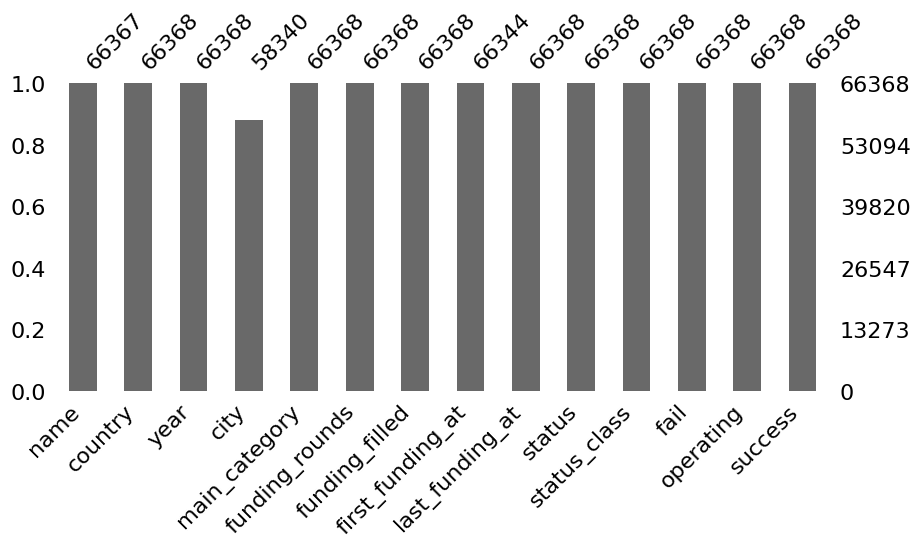

In [53]:
msno.bar(df,figsize=(10,4))

In [54]:
df.isnull().sum()/df.count()*100

name                 0.001507
country              0.000000
year                 0.000000
city                13.760713
main_category        0.000000
funding_rounds       0.000000
funding_filled       0.000000
first_funding_at     0.036175
last_funding_at      0.000000
status               0.000000
status_class         0.000000
fail                 0.000000
operating            0.000000
success              0.000000
dtype: float64

How Many Startups Succeed or Fail?

In [55]:
success_ratio = df.success.mean()*100
print(f'{df.success[df.success == 1].count()} startups reach success, what means {success_ratio:.2f}% of total')


7096 startups reach success, what means 10.69% of total


In [56]:
fail_ratio = df.fail.mean()*100
print(f'{df.fail[df.fail == 1].count()} startups fail, what means {fail_ratio:.2f}% of total')

6238 startups fail, what means 9.40% of total


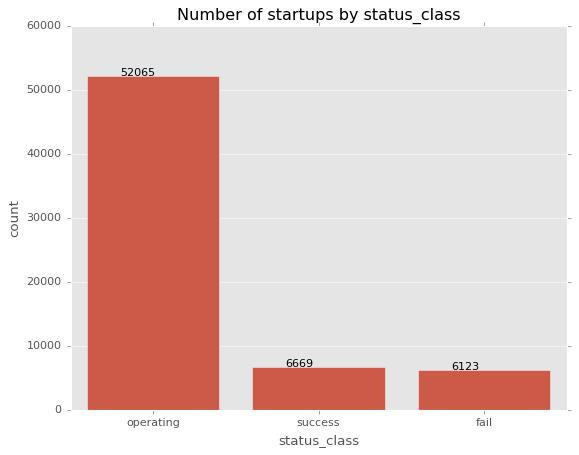

In [72]:
plt.style.use('ggplot')
plt.figure(figsize=(8,6))
plt.title('Number of startups by status_class')
sns.barplot(x= df.status_class.value_counts().index, y=df.status_class.value_counts())
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-.20,y[i],y[i])

addlabels(df.status_class.value_counts().index,df.status_class.value_counts())

<h3>Filter the startups by foundation year</h3>
Let's see only the startups founded after 1990, cause we want to see if there's a pattern between the most recent startups

In [73]:
df = df[(df.year > 1990) & (df.year < 2023)]
df.count().max()

np.int64(64857)

In [74]:
def group_by_status(column_name):
  # Group by a feature and calculate the fail/success rate
  group = df.groupby(column_name)[['success','fail','operating']].sum()
  group['total'] = group.sum(axis=1)
  group['success_ratio'] = group.success/group.total
  group['fail_ratio'] = group.fail/group.total
  return group


year_status = group_by_status('year')
year_status.sort_values(by='year', ascending=False).head()

,success,fail,operating,total,success_ratio,fail_ratio
year,,,,,,
2015,48,621,2791,3460,0.013873,0.179480
2014,151,448,7155,7754,0.019474,0.057777
2013,172,358,7296,7826,0.021978,0.045745
2012,325,509,7097,7931,0.040978,0.064179
2011,455,551,5960,6966,0.065317,0.079098


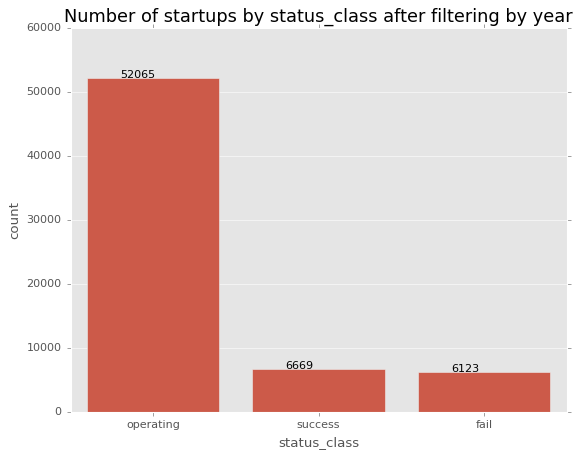

In [75]:
df = df[df.year < 2016]
year_status = year_status[year_status.index < 2016]
plt.figure(figsize=(8,6))
plt.title('Number of startups by status_class after filtering by year', size=16)
sns.barplot(x= df.status_class.value_counts().index, y=df.status_class.value_counts())
addlabels(df.status_class.value_counts().index,df.status_class.value_counts())

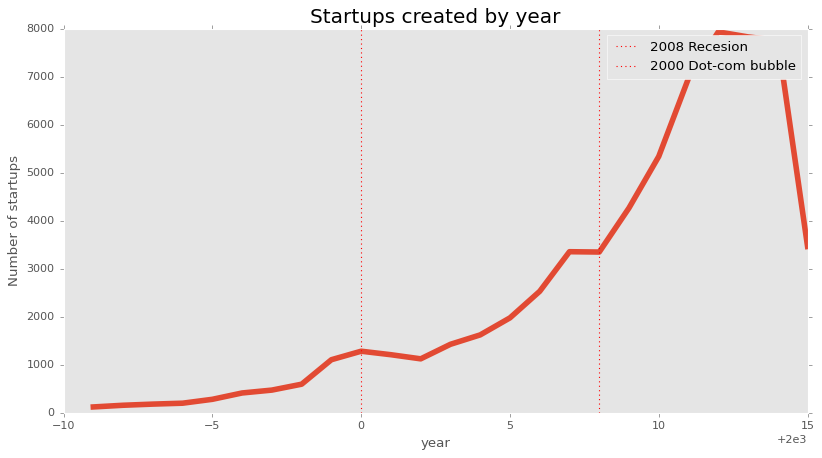

In [76]:
plt.figure(figsize=(12,6))
plt.title('Startups created by year', size=18)
plt.ylabel('Number of startups',size=12)
plt.grid()
sns.lineplot(data=year_status, x=year_status.index, y=year_status.total, linewidth=5)
plt.axvline(x=2008, color="red", label="2008 Recesion",linestyle=':')
plt.axvline(x=2000, color="red", label="2000 Dot-com bubble",linestyle=':')
plt.legend()

In [77]:
country_status = group_by_status('country')

# Filter by countries with at least 50 startups
countries_most = country_status.total[country_status.total >= 50]
print(f'There are {countries_most.count()} countries with at least 50 startups')

There are 49 countries with at least 50 startups


## Let's visualize how is the behavior of startups depending on the country.

We'll going to ignore countries with less than 50 startups, because could distort the final result.

In [78]:
country_status = group_by_status('country')

# Filter by countries with at least 50 startups
countries_most = country_status.total[country_status.total >= 50]
print(f'There are {countries_most.count()} countries with at least 50 startups')

There are 49 countries with at least 50 startups


In [80]:
# Let's the proportion of the total startupos by countries
countries_analysis = country_status[country_status.total >= 50]
top_ten = countries_analysis.total.sort_values(ascending=False).head(10)
rest_world = pd.Series(countries_analysis.total.sort_values(ascending=False)[11:].sum(axis=0), index=['REST OF WORLD'])
world = top_ten.append(rest_world)

plt.figure(figsize=(12,8))
plt.title('Top 10 countries with more startups vs. Rest of world', size=18)
squarify.plot(sizes=world, label=world.index, color=sns.color_palette("magma",len(world)), alpha = 0.7)
plt.axis('off')
plt.show()

AttributeError: 'Series' object has no attribute 'append'